# Module 1. Samples


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

In [2]:
#pip install --upgrade scipy==1.6.0

## Opening a Dataset, General Information

 **de basics**

In [3]:
# Importing the Titanic dataset. (Rajagopalan, 2021, p. 106)
titanic = pd.read_csv('https://raw.githubusercontent.com/DataRepo2019/Data-files/master/titanic.csv')
# Show the first few records of the Data Frame
titanic.head()

# How many  rows does the DataFrame have?
print(f"Number of rows: {len(titanic)}")
# How many columns?
print(f"Number of columns: {len(titanic.columns)}")
# How many rows and columns, i.e. the shape
print(f"The shape of the Data Frame is: {titanic.shape}")
# General information about the DataFrame
print("*"*50)
titanic.info()

# Give the data type of each column.
print("*"*50)
print(titanic.dtypes)

# How many columns of each data type are there?
#   Watch it! The book says to use get_dtype_counts(), but this method no longer exists
print("*"*50)
print(titanic.dtypes.value_counts())

Number of rows: 891
Number of columns: 12
The shape of the Data Frame is: (891, 12)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
**************************************************
PassengerId      int64
Survived         int64
Pclass      

een kolom als index zetten:

In [4]:
titanic.set_index(['PassengerId'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Qualitative variables
soms is er een variable verkeerd ingesteld, je kan deze verzetten naar een kwalitatieve variable 

In [5]:
# Describe the variable Survived -> is considered to be quantitative
print(titanic.Survived.describe())
# Convert to a categorical variable
titanic.Survived = titanic.Survived.astype('category')
# Ask to describe once more -> not it is considered to be qualitative
print(titanic.Survived.describe())

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
count     891
unique      2
top         0
freq      549
Name: Survived, dtype: int64


je kan ook variable als ordinale aanwijzen

In [6]:
print(titanic.Embarked.unique())

embarked_type = CategoricalDtype(categories=['S', 'C', 'Q'], ordered=True)
titanic.Embarked = titanic.Embarked.astype(embarked_type)
titanic.Embarked.describe()

['S' 'C' 'Q' nan]


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

toon deze waarden in een staafdiagram zoals deze  
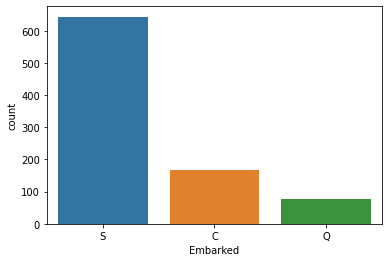

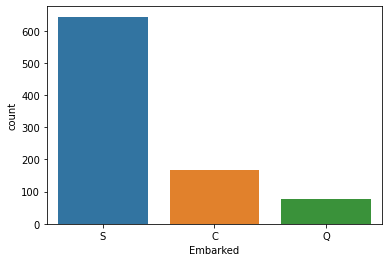

In [7]:
sns.countplot(data=titanic, x='Embarked')

## selecting data
enkele eenvoudige code 

In [8]:
# Select adjacent columns
titanic.iloc[:, 2:4]

titanic[['Name', 'Age', 'Cabin']] # Note: two sets of square brackets!

# Observation with row number 5 (counting from zero)
print(titanic.iloc[5])

# The first 4 observations
titanic.iloc[0:4]

# Select observations where the value of Age is less than 18
titanic[titanic.Age < 18]  

# The same, but only keep the column 'Embarked'
titanic[titanic.Age < 18].Embarked

# The same, but keep columns 'Age' and 'Embarked'
titanic[titanic['Age'] < 18][['Age', 'Embarked']]

# Select all boys younger than 10
titanic.query("(Sex=='male') and (Age < 18)")

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,NaN,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.00,0,0,7534,9.2167,NaN,S
163,164,0,3,"Calic, Mr. Jovo",male,17.00,0,0,315093,8.6625,NaN,S


## Dropping Data and Working with Missing Data


een kolom verwijderen kan zo

In [9]:
titanic.drop("PassengerId", axis="columns")

#volledig verwijderen
titanic= titanic.drop("PassengerId", axis="columns")

cleaned = titanic.dropna() # Drop any row that has at least one missing value
print(cleaned.info())
cleaned.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  183 non-null    category
 1   Pclass    183 non-null    int64   
 2   Name      183 non-null    object  
 3   Sex       183 non-null    object  
 4   Age       183 non-null    float64 
 5   SibSp     183 non-null    int64   
 6   Parch     183 non-null    int64   
 7   Ticket    183 non-null    object  
 8   Fare      183 non-null    float64 
 9   Cabin     183 non-null    object  
 10  Embarked  183 non-null    category
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 14.9+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## Creating New Columns

In [10]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

NameError: name 'air_quality' is not defined

#Module 2: Analysis of variable
Gemiddelde, mediaan, modus

## Qualitative Variables

voorbeeld van een barplot  
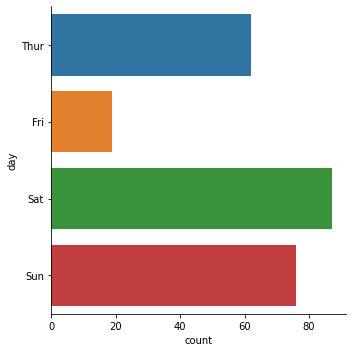

In [ ]:
# Bar chart in Seaborn: catplot() with 'kind = "count"''
sns.catplot(data = tips, kind = "count", y = "day");

In [ ]:
# Bar chart using Altair: mark_bar()
alt.Chart(tips).mark_bar().encode(
    x=alt.X("count()",
            axis=alt.Axis(title="Amount")),
    y=alt.Y("day:O", 
            axis=alt.Axis(title="Weekday"), sort=["Thur", "Fri", "Sat", "Sun"]),
    color='day')

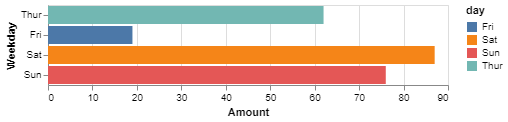

### Centrality Measures

In [ ]:
# Mode for all the variables in the DataFrame
tips.mode()

# Mode for a specific variable
tips["day"].mode()

# Some descriptive measures
tips["day"].describe()

een voorbeeld van module 2 om de modus op een advanced manier te tonen

In [ ]:
print("Selection 1 ********************************")
female = ais[(ais.sex == "f") & (ais.sport == "Row")]
print(f"female: { female.id.count()}")
male = ais[(ais.sex == "m") & (ais.sport == "Row")]
print(f"Male: { male.id.count()}")
print("mode: " + ais[ais.sport == "Row"].mode()["sex"][0])

print("Selection 2 ********************************")
female = (ais.sex == "f")
fdf = ais[female]
femalesports = fdf[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")]
print(f"female: { femalesports.id.count()}")

male = (ais.sex == "m")
mdf = ais[male]
malesports = mdf[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")]
print(f"male: { malesports.id.count()}")
print("mode: " + ais[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")].mode()["sex"][0])

print("Selection 3 ********************************")
mdf = ais[ais.sex == 'f']
femaleBR = mdf[(ais.sport == "B_Ball") | (ais.sport == "Row") ]
print(f"females: { femaleBR.id.count()}")
print(f"males: 0")
print("mode: " + ais[(ais.sport == "B_Ball") | (ais.sport == "Row") ].mode()["sex"][0])


## Quantitative Variables  
### Visualisation

In [ ]:
# Visualisation using a box plot (Seaborn)
sns.boxplot(data = tips, x = "tip");

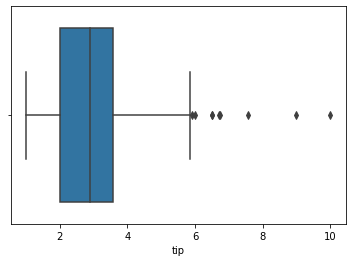

In [ ]:
# Box plot (Altair)
alt.Chart(tips).mark_boxplot().encode(
    x=alt.X("tip:Q"))

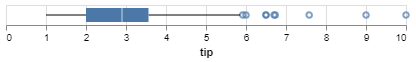

In [ ]:
# Violin plot (Seaborn)
sns.violinplot(data = tips, x = "tip");

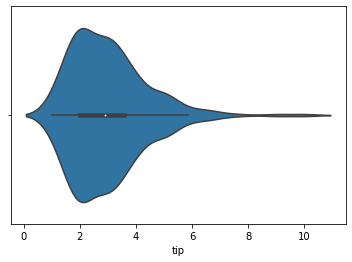

In [ ]:
sns.kdeplot(x = tips["tip"]);

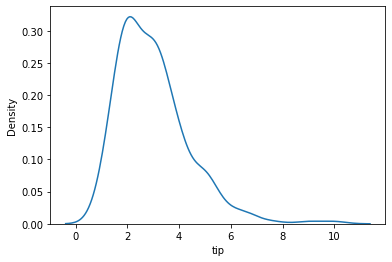

In [ ]:
sns.displot(x = tips['tip'], kde=True);

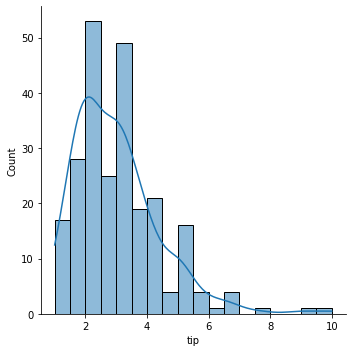

## Centraliteit en verspreidingsproblemen

In [ ]:
# Centrality and dispersion deasures
# Mean, standard deviation & friends
print(f"Mean:                {tips['tip'].mean()}")
print(f"Standard deviation:  {tips['tip'].std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {tips['tip'].var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {tips['tip'].skew()}")
print(f"Kurtosis:            {tips['tip'].kurtosis()}")

# Median & co
print(f"Minimum:   {tips['tip'].min()}")
print(f"Median:    {tips['tip'].median()}")
print(f"Maximum:   {tips['tip'].max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", tips['tip'].quantile(percentiles))
print("Inter Quartile Range:", tips['tip'].quantile(.75) - tips['tip'].quantile(.25))
print(f"Range :    {tips['tip'].max() - tips['tip'].min()}")


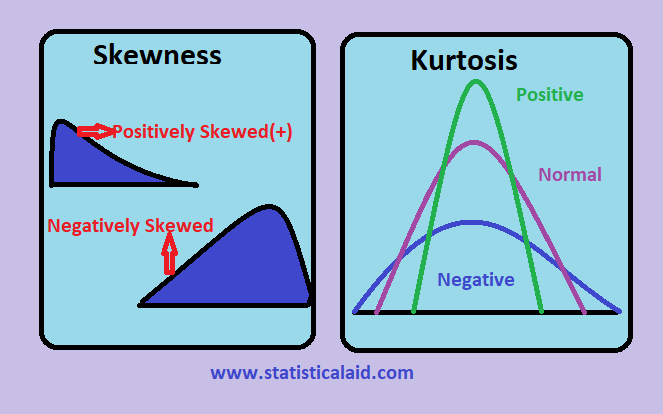

oplossing uit lab-2-02 

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [ ]:
print(f"Mean {android['Time'].mean()}")
print(f"STD  {android['Time'].std()}")

print(f"Mean {android.groupby('DataSize')['Time'].mean()}")
print(f"std {android.groupby('DataSize')['Time'].std()}")

print(f"Mean  {android.groupby(['DataSize','PersistenceType'])['Time'].mean()}")
print(f"STD  {android.groupby(['DataSize','PersistenceType'])['Time'].std()}")

# Module 3: De centrale limietstelling

## de normaal verdeling

μ= gemiddelde  
σ= standaarafwijking

De standaard normale verdeling kan als volgt worden uitgezet:

In [ ]:
# Take 100 values for the X-axis, between -4 and 4, evenly spaced
x = np.linspace(-4, +4, num=101)
y = stats.norm.pdf(x, 0, 1)
# Plot the probability density function (pdf) for these X-values
plt.plot(x, y)

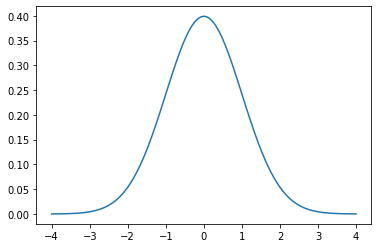

We can generalize this code for the normal distribution. As an example we take $X \sim Nor(\mu = 5, \sigma = 1.5)$. All points of interest on the Gauss curve are located at most 4 standard deviations left or right of the mean. Consequently, that's how we're going to calculate our x-values. The `pdf()`-function allows us to specify mean and standard deviation as parameters.

In [ ]:
m = 5    # Gemiddelde
s = 1.5  # Standaardafwijking
x = np.linspace(m - 4 * s, m + 4 * s, num=201)
plt.plot(x, stats.norm.pdf(x, loc=m, scale=s))

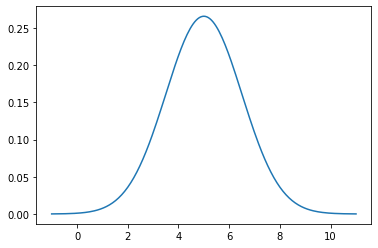

In [ ]:
# Waarschijnlijkheidsdichtheid van een normale verdeling met verschillende standaard
# afwijkingen
m = 5    # Mean
x = np.linspace(m - 4 * s, m + 4 * s, num=201)

plt.plot(x, stats.norm.pdf(x, loc=m, scale=.75))
plt.plot(x, stats.norm.pdf(x, loc=m, scale=1.5))
plt.plot(x, stats.norm.pdf(x, loc=m, scale=3))

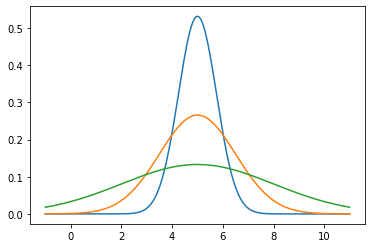

### Histogram met theoretische kansdichtheid

Het volgende voorbeeld laat zien hoe u een histogram van normaal verdeelde gegevens plot, waarbij de theoretische kansdichtheidsfunctie als een lijngrafiek wordt gesuperponeerd.

In [ ]:
# Generate 250 random numbers, following a normal distribution
n = 250
observations = np.random.normal(loc=m, scale=s, size=n)

# Plot histogram, without probability density
obs_hist = sns.histplot(observations, kde=True)

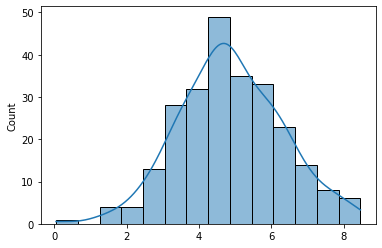

In [ ]:
# histogram with observations
obs_hist = sns.histplot(observations, stat = "density", kde=True)
# X-axis values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Probability density for the X-values
dist_y = stats.norm.pdf(dist_x, m, s)

# Plot the Gayss curve superimposed on the histogram
obs_hist.plot(dist_x, dist_y, 'red', lw=2)

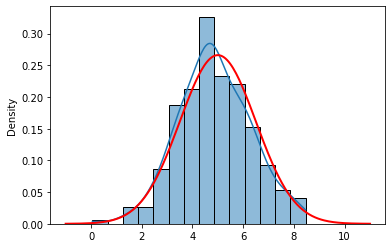

##  Kansverdeling in de normale verdeling

stel de notatie = $P(X > 6.5)$ dan gebruiken we volgende code

In [ ]:
#deze waarden zijn gegeven
m = 5
s = 1.5

stats.norm.sf(6.5, m, s)

we kunnen dit ook voorstellen met een grafiek

In [ ]:
# Left tail probability plot

# X-values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)
# Fill the area left of x
plt.fill_between(dist_x, 0, dist_y, where=dist_x <= x, color='lightblue')
# Show the mean with an orange line
plt.axvline(m, color="orange", lw=5)
# Show x with a green line
plt.axvline(x, color="green")

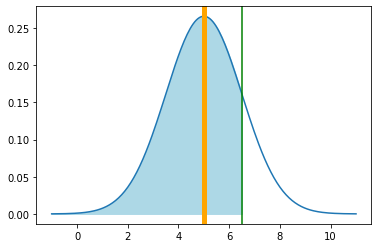

stel de notatie = $P(X < 6.5)$ dan gebruiken we volgende code


In [ ]:
#deze waarden zijn gegeven
m = 5
s = 1.5

stats.norm.cdf(6.5, m, s)

stel de notatie = $P(2< X < 6.5)$ dan gebruiken we volgende code


In [ ]:
stats.norm.cdf(6.5, loc=m, scale=s) - stats.norm.cdf(2, loc=m, scale=s)))

stel ze vragen: Tussen welk interval, symmetrisch rond het gemiddelde, zal je 50% van de waarnemingenvinden? (voorbeeld examen)

In [ ]:
print("(Ondergrens) ~= %.3f" % stats.norm.isf(1-0.25, m, s))
print("(Bovengrens) ~= %.3f" % stats.norm.isf(0.25, m, s))

## Betrouwbaarheidsintervallen
Een betrouwbaarheidsinterval is een schatting in de vorm van een gebied waarbinnen u verwacht dat het onbekende populatiegemiddelde met een bepaald betrouwbaarheidsniveau is.

Laten we zeggen dat we n = 100 waarnemingen van Superman's reactiesnelheid hebben en we krijgen een steekproefgemiddelde van 5,2 ms. We nemen aan dat we de werkelijke standaarddeviatie van zijn reactiesnelheid kennen en dat deze 1,5 ms is.

Om een betrouwbaarheidsinterval te bepalen, gaan we als volgt te werk:

1. We nemen het steekproefgemiddelde als initiële schatting en kiezen een betrouwbaarheidsniveau, bijvoorbeeld $1 - \alpha = 0.95$ (or 95%).
2. We vinden dan de z-score waartussen 95% van alle waarden bij een standaard normale verdeling liggen.
3. Hiermee bepalen we de waarden links en rechts van het steekproefgemiddelde waartussen we verwachten dat 95% van de waarden zal vallen voor de kansverdeling die we krijgen uit de centrale limietstelling.

In [ ]:
# Step 1.
m = 5.2      # Sample mean
s = 1.5      # Population standard deviation
n = 100      # Sample size
alpha = .05  # 1 - alpha is the confidence level

# Step 2.
z = stats.norm.isf(alpha/2)
print("z-score: %.5f" % z)

# Step 3.
lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

We concluderen met een betrouwbaarheidsniveau van 95% dat de reactiesnelheid van Superman ergens tussen 4,91 en 5,49 ms ligt.

## Betrouwbaarheidsintervallen voor kleine steekproeven
Als we een kleine steekproef hebben ( n<30 ), gaat de veronderstelling die we in de centrale limietstelling hebben gemaakt niet langer op. In dat geval kunnen we de normale verdeling niet gebruiken.

Er is echter nog steeds een manier om een ​​betrouwbaarheidsinterval te construeren via de zogenaamde Student-t-verdeling. Deze verdeling lijkt op de normale verdeling in die zin dat de kansdichtheidsfunctie eruitziet als een Gauss-curve. De Student-t-verdeling houdt echter ook rekening met de steekproefomvang n, dus u moet deze specificeren. De dichtheidsfunctie krijgt een extra parameter genaamd het aantal vrijheidsgraden (afgekort df of dof) en is gelijk aan n−1 .

Hoe kleiner de vrijheidsgraden, hoe "platter" de curve en hoe groter de verkregen betrouwbaarheidsintervallen. Dit vertegenwoordigt de grotere onzekerheid die we krijgen vanwege de kleine steekproefomvang. Hoe groter de steekproefomvang n is, hoe dichter de curve die van de normale verdeling zal benaderen.

In onderstaande grafiek vind je de dichtheidsfunctie voor de Student-t-verdeling voor verschillende vrijheidsgraden:

In [ ]:
x = np.linspace(-4, +4, num=100)
fig, tplot = plt.subplots(1, 1)
tplot.plot(x, stats.norm.pdf(x, 0, 1), label="Normal distribution")
tplot.plot(x, stats.t.pdf(x, 1), label="df=1") 
tplot.plot(x, stats.t.pdf(x, 3), label="df=3")
tplot.plot(x, stats.t.pdf(x, 8), label="df=8")
tplot.plot(x, stats.t.pdf(x, 30), label="df=30")
tplot.legend(loc='best')

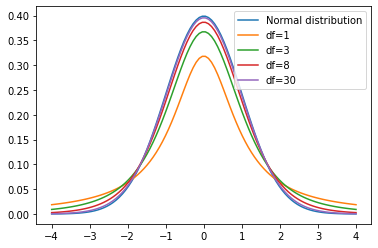

Om dit te illustreren herhalen we het eerdere voorbeeld, maar nemen aan dat de steekproefomvang slechts 15 was.

In [ ]:
# Step 1.
m = 5.2      # Sample mean
s = 1.5      # Population standard deviation
n = 15       # Sample size
alpha = .05  # 1 - alpha is the confidence level

# Stap 2.
t = stats.t.isf(alpha/2, df = n - 1)
print("t-score: %.5f" % t)

# Stap 3.
lo = m - t * s / np.sqrt(n)
hi = m + t * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

oefening van voorbeelexamen

In [ ]:
# Step 1.
m = df.Months.mean()                 # Sample mean
s = df.Months.std()                  # Population standard deviation
n = df.Months.count()                # Sample size
alpha = .20                          # 1 - alpha is the confidence level

# Stap 2.
t = stats.t.isf(alpha/2, df = n - 1)
print("t-score: %.5f" % t)

# Stap 3.
lo = m - t * s / np.sqrt(n)
hi = m + t * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

We stellen dus met een betrouwbaarheidsniveau van 95% dat de reactiesnelheid van de superhelden tussen 4,37 en 6,03 ms ligt.

Dit interval is aanzienlijk breder dan wat we met een grotere steekproef hebben verkregen. We zijn dus minder zeker van de positie van het populatiegemiddelde.

overzichtelijke foto van wnr wat gebruiken

## De Z-test
De z-test wordt gebruikt om een aanname over het (onbekende) populatiegemiddelde te bevestigen of te weerleggen op basis van een voldoende grote steekproef.

### De rechtszijdige z -test
Algemeen wordt aangenomen dat superhelden elke dag gemiddeld $\mu = 3.3$ mensen redden. Onderzoekers willen deze veronderstelling controleren en een steekproef van 30 superhelden uitvoeren. In deze steekproef is het gemiddelde $\overline{x}=3.483$ . We kunnen dus veronderstellen dat superhelden gemiddeld meer reddingen uitvoeren.

De standaarddeviatie in de populatie wordt bekend verondersteld en is σ=0,55 .

De testprocedure verloopt dan als volgt:  
**Stap 1.** Formuleer de hypothesen:

- $H_0: \mu = 3.3$
- $H_1: \mu > 3.3$  

**Stap 2.** Kies een significantieniveau, b.v. $\alpha = 0.05$

In [ ]:
# Properties of the sample:
n = 30      # sample size
sm = 3.483  # sample mean
s = 0.55    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)


**Stap 3.**   
Bepaal de waarde van de toetsstatistiek, in dit geval $\overline{x} = 3.483$

**Stap 4.**  
bepaal the p-value and verwerp $H_0$ als $p < \alpha$.

In [ ]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)

p-value: 0.03420  
p < a: reject H0

een grafiek van dit voorbeeld: 

In [ ]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue')

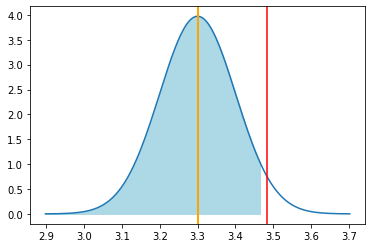

### The linkerzijdige $z$-test
Laten we aannemen dat het resultaat van de steekproef $\overline{x} = 3.117$ was. In dat geval hebben we redenen om aan te nemen dat het populatiegemiddelde lager is dan 3,3. We kunnen dit verifiëren met een linkszijdige z-test.

**Stap 1.** Formuleer de hypothesen:

- $H_0: \mu = 3.3$
- $H_1: \mu < 3.3$  

**Stap 2.** Kies een significantieniveau, b.v. $\alpha = 0.05$

In [ ]:
# Properties of the sample:
n = 30      # sample size
sm = 3.117  # sample mean
s = 0.55    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Stap 3.**   
Bepaal de waarde van de toetsstatistiek, in dit geval $\overline{x} = 3.117$

**Stap 4.**  
bepaal the p-value and verwerp $H_0$ als $p < \alpha$.

In [ ]:
p = stats.norm.cdf(sm, loc=m0, scale=s/np.sqrt(n)) # Let op! cdf() ipv sf()!
print("p-waarde: %.5f" % p)
if(p < a):
    print("p < a, dus H0 verwerpen")
else:
    print("p > a, dus H0 niet verwerpen")

p-waarde: 0.03420  
p < a, dus H0 verwerpen

In dit geval ligt de kritische waarde g links van het gemiddelde. Rechts van g mag je H0 (acceptatiegebied) niet verwerpen, links wel (kritiek gebied).

We kunnen concluderen dat als we aannemen dat  $H_0$ waar is, de kans om een steekproef te trekken uit deze populatie met deze specifieke waarde voor $\overline{x}$ inderdaad erg klein is. Met het gekozen significantieniveau kunnen we de nulhypothese verwerpen.

In [ ]:
# Gauss-curve:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue')

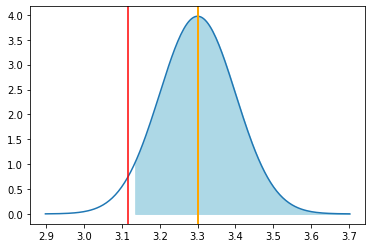

### The two-tailed $z$-test
Als we niet willen testen of het populatiegemiddelde groter of lager is dan een hypothetische waarde, maar alleen willen weten of het steekproefgemiddelde "dicht genoeg bij elkaar ligt", kunnen we een tweezijdige $z$-test gebruiken.  
**Stap 1.** Formuleer de hypothesen:

- $H_0: \mu = 3.3$
- $H_1: \mu \ne 3.3$  

**Stap 2.** Kies een significantieniveau, b.v. $\alpha = 0.05$

In [ ]:
# Properties of the sample:
n = 30      # sample size
sm = 3.483  # sample mean
s = 0.55    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Stap 3.**   
Bepaal de waarde van de toetsstatistiek, in dit geval $\overline{x} = 3.483$

**Stap 4.**  
bepaal the p-value and verwerp $H_0$ als $p < \alpha/2$.

In [ ]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-waarde: %.5f" % p)
if(p < a/2):
    print("p < a/2, dus H0 verwerpen")
else:
    print("p > a/2, dus H0 niet verwerpen")

p-waarde: 0.03420  
p > a/2, dus H0 niet verwerpen


In dit geval hebben we twee kritische waarden: g1 aan de linkerkant van het gemiddelde en g2 aan de rechterkant. Het acceptatiegebied heeft nog steeds oppervlakte 1−α en het kritieke gebied heeft oppervlakte α .

In [ ]:
g1 = m0 - stats.norm.isf(a/2) * s / np.sqrt(n)
g2 = m0 + stats.norm.isf(a/2) * s / np.sqrt(n)

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < sm and sm < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % sm)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % sm)

Acceptance region [g1, g2] ≃ [3.103, 3.497]  
Sample mean = 3.483 is inside acceptance region: do not reject H0

In [ ]:
# Gauss-curve
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=m0, scale=s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=m0, scale=s/np.sqrt(n))
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue')

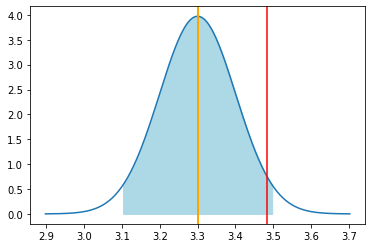

### Rechtszijdige $t$-test
Stel dat de superheldenonderzoekers door tijdgebrek geen voldoende grote steekproef konden nemen en slechts $n = 20$ waarnemingen deden, met hetzelfde steekproefgemiddelde $\overline{x} = 3,483$ . De standaarddeviatie in deze steekproef bleek $s = 0.55$ te zijn.

Kunnen we onder deze omstandigheden, met hetzelfde significantieniveau $\alpha = 0,05$, de conclusie volhouden dat superhelden *meer* dan 3,3 mensen per dag redden?  
**Stap 1.** Formuleer de hypothesen:

- $H_0: \mu = 3.3$
- $H_1: \mu > 3.3$  

**Stap 2.** Kies een significantieniveau, b.v. $\alpha = 0.05$

In [ ]:
# Properties of the sample:
n = 20      # sample size
sm = 3.483  # sample mean
ss = 0.55   # sample(!) standard deviation
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Stap 3.**   
Bepaal de waarde van de toetsstatistiek, in dit geval $\overline{x} = 3.483$

**Stap 4.**  
bepaal the p-value and verwerp $H_0$ als $p < \alpha$.

In [ ]:
# Remark that we use the t-distribution here!
p = p = stats.t.sf(sm, loc=m0, scale=ss/np.sqrt(n), df=n-1)
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.07658  
p > a: do not reject H0

Om de kritische waarde te berekenen, gebruiken we de functie isf() met $n-1$ graden
van vrijheid.

In [ ]:
g = stats.t.isf(a, loc=m0, scale=ss/np.sqrt(n), df=n-1)
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 3.513  
sample mean = 3.483 < g = 3.513: do not reject H0


In [ ]:
# Gauss-curve
# X-values
dist_x = np.linspace(m0 - 4 * ss/np.sqrt(n), m0 + 4 * ss/np.sqrt(n), num=201)
# Y-values
dist_y = stats.t.pdf(dist_x, loc=m0, scale=ss/np.sqrt(n), df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m0, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue')

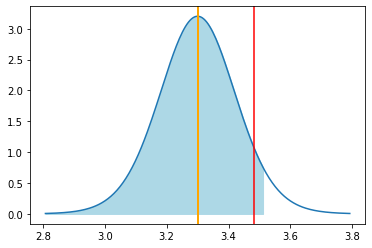

Met andere woorden, zelfs als we vergelijkbare resultaten krijgen in onze steekproef, kunnen we niet tot dezelfde conclusie komen. Omdat onze steekproef te klein is, is er meer onzekerheid of de waarde van het steekproefgemiddelde extreem genoeg is om de nulhypothese te verwerpen.

### two-tailed t-test 

In [ ]:
observations = [
  3, 2, 3, 1, 10, 4, 2, 7, 3, 0,
  3, 1, 2, 3,  4, 0, 3, 8, 3, 7]
a = 0.05
m0 = 3.3

t_stat, p_val = stats.ttest_1samp(observations, m0)
print("Sample mean        : %.3f" % np.mean(observations))
print("t-score            : %.3f" % t_stat)
print("p-value (2-tailed) : %.5f" % p_val)
print("p-value (1-tailed) : %.5f" % (p_val/2))

Sample mean        : 3.450  
t-score            : 0.254  
p-value (2-tailed) : 0.80253  
p-value (1-tailed) : 0.40127

Als je een eenzijdige test wilt doen, kun je de juiste conclusie afleiden uit de resultaten van de functie. De t-score is negatief als het steekproefgemiddelde links van m0 ligt. In dat geval zou u een linkszijdige toets uitvoeren. In een eenzijdige toets delen we het resultaat voor p door 2 en vergelijken met α . De beslissing wordt dan:

- Voor een rechtszijdige toets: als $p/2 < \alpha$ en $t > 0$ kunnen we de nulhypothese verwerpen

- Voor een linkszijdige toets: als $p/2 < \alpha$ en $t < 0$ kunnen we de nulhypothese verwerpen  

De conclusie hier is dat het steekproefgemiddelde van 3.45 geen voldoende reden is om de nulhypothese te verwerpen omdat $p \approx 0.401$ groter is dan het significantieniveau $\alpha = 0.05$.

# Module 4: Bivariate analyse - 2 kwalitatieve variabelen

## Contingentietabellen en visualisatietechnieken

Stel dat we willen weten of vrouwen en mannen (variabel geslacht) binnen de steekproef verschillend hebben geantwoord op een enquêtevraag met een Likert-schaal (variabele enquête).

Als de verhoudingen van de antwoorden (1 tot 5) voor vrouwen en mannen ongeveer gelijk zijn, zeggen we dat er geen verband is tussen de twee variabelen. Als er een significant verschil is, dan is er een verband. Nu is natuurlijk de vraag wanneer het verschil groot genoeg is om als significant te worden beschouwd...

Een eerste stap is het berekenen van een contingentietabel. We tellen meteen de marginale totalen op:

In [ ]:
pd.crosstab(rlanders.Survey, rlanders.Gender, margins=True)

In [ ]:
sns.catplot(data=rlanders, x='Survey', hue='Gender', kind='count')

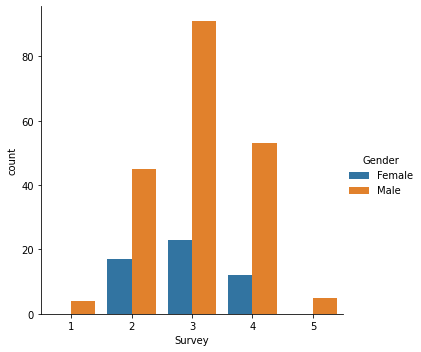

## Chi-squared and Cramér's V
Chi-kwadraat ( χ2 ) en Cramer's V zijn statistieken die ons kunnen helpen om te bepalen of er een verband is tussen twee kwalitatieve (categorische) variabelen.

De redenering gaat als volgt: als er geen verband is tussen Gender en Survey, dan verwachten we dat de verhoudingen van de waarden van Survey hetzelfde zijn voor alle waarden van Gender. Met andere woorden, voor zowel vrouwen als mannen zal hetzelfde percentage respondenten hetzelfde antwoord geven op de vraag.

In [ ]:
observed = pd.crosstab(rlanders.Survey, rlanders.Gender)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

print(row_sums)
print(col_sums)
print(f'Number of observations: {n}')

In [ ]:
expected = np.outer(row_sums, col_sums) / n
expected

In [ ]:
expected - observed

In [ ]:
diffs = (expected - observed)**2 / expected
print(diffs)

In [ ]:
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

χ² ≈ 4.255

In [ ]:
dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v)

0.13046762087242633

| Cramér's V | Interpretation          |
| :---:      | :---                    |
| 0          | No association          |
| 0.1        | Weak association        |
| 0.25       | Moderate association    |
| 0.50       | Strong association      |
| 0.75       | Very strong association |
| 1          | Complete association    |

## The chi-squared test for independence
Om de vraag te beantwoorden wanneer de waarde van chi-kwadraat voldoende is om een verband tussen twee variabelen aan te nemen, kunnen we de *chi-kwadraat-onafhankelijkheidstest* gebruiken.
### The chi-squared distribution
De waarde van $\chi^2$ volgt een specifieke stochastische verdeling die de $\chi^2$-verdeling wordt genoemd. Net als bij de Student-t-verdeling hangt de vorm van de kansdichtheidsfunctie af van de vrijheidsgraden, die in deze context $df = (r-1)\times(k-1)$ (met $r$ de aantal rijen in de contingentietabel en $k$ het aantal kolommen).  

Onderstaande code geeft de kansdichtheidsfunctie van de $\chi^2$-verdeling weer voor een aantal vrijheidsgraden:

In [ ]:
# Plot of the chi-squared distribution for different degrees of freedom
x = np.linspace(0, 10, num=100)
fig, tplot = plt.subplots(1, 1)
tplot.set_ylim([0, 0.8])
tplot.plot(x, stats.chi2.pdf(x, 1), label="df=1") 
tplot.plot(x, stats.chi2.pdf(x, 2), label="df=2") 
tplot.plot(x, stats.chi2.pdf(x, 3), label="df=3")
tplot.plot(x, stats.chi2.pdf(x, 5), label="df=5")
tplot.plot(x, stats.chi2.pdf(x, 10), label="df=10")
tplot.legend(loc='best')

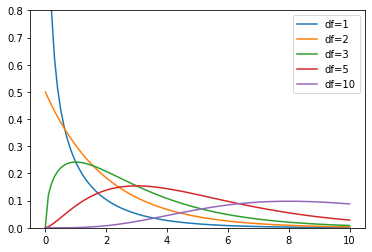

### Test procedure
Formally, the procedure of the $\chi^2$ test for independence runs as follows:

1. Formulate the hypotheses:
   - $H_0$: There is no association between the variables (the differences between observed and expected values are small)
   - $H_1$: There is an association between the variables (the differences are large)
2. Choose significance level $\alpha$
3. Calculate the value of the test statistic in the sample (here: $\chi^2$).
4. Use one of the following methods (based on the degrees of freedom $df = (r-1) \times (k-1)$):
   1. Determine critical value $g$ so $P(\chi^2 > g) = \alpha$
   2. Calculate the $p$-value
5. Draw a conclusion based on the outcome:
   1. $\chi^2 < g$: do not reject $H_0$; $\chi^2 > g$: reject $H_0$
   2. $p > \alpha$: do not reject $H_0$; $p < \alpha$: reject $H_0$

In Python, we can calculate this as follows:

In [ ]:
alpha = .05
dimensions = observed.shape
dof = (dimensions[0]-1) * (dimensions[1]-1)

print("Chi-squared        : %.4f" % chi_squared)
print("Degrees of freedom : %d" % dof)

# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print("Critical value     : %.4f" % g)

# Calculate p-value
p = stats.chi2.sf(chi_squared, df=dof)
print("p-value            : %.4f" % p)

Chi-squared        : 4.2555  
Degrees of freedom : 4  
Critical value     : 9.4877  
p-value            : 0.3725

dit kan ook makkelijker...

In [ ]:
# Chi-squared test for independence based on a contingency table
observed = pd.crosstab(rlanders.Survey, rlanders.Gender)
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

Chi-squared       : 4.2555  
Degrees of freedom: 4  
P-value           : 0.3725

grafiekje: 

In [ ]:
# Is there an association between Gender and Survey?

# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=4)  # TODO: CHECK this!

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

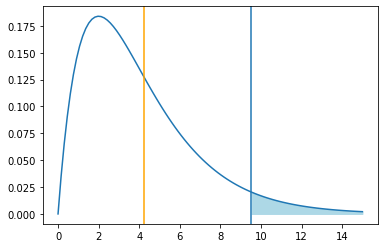

We zien dat χ2 ruim binnen het acceptatiegebied ligt. De p -waarde is ook groter dan α . Bijgevolg kunnen we de nulhypothese niet verwerpen en concluderen dat er op basis van deze steekproef geen reden is om aan te nemen dat er een significant verschil is tussen de antwoorden van vrouwen en mannen op de onderzoeksvraag.

## Goodness-of-fit test
Stel dat we in een steekproef van superhelden bijhouden welk type ze zijn en dat we ook weten hoe vaak elk type voorkomt in de hele populatie (in procenten). Hieronder zijn de absolute frequenties in de steekproef $o_i$ en de verwachte relatieve frequenties $\pi_i$ in de populatie:

In [ ]:
types =               ['mutant', 'human', 'alien', 'god', 'demon']
observed =   np.array([   127,      75,      98,     27,     73])
expected_p = np.array([   .35,     .17,     .23,    .08,    .17])

### Test procedure

To answer these kinds of questions, a goodness-of-fit test is suitable. The procedure is as follows:

1. Formulate the hypotheses:
   - $H_0$: De steekproef is representatief voor de populatie, d.w.z. de frequentie van elke klasse binnen de steekproef komt goed overeen met die in de populatie.
   - $H_1$: De steekproef is niet representatief voor de populatie, d.w.z. de verschillen met de verwachte frequenties zijn te groot.
2. Choose significance level $\alpha$
3. Calculate the value of the test statistic in the sample (here: $\chi^2$).
4. Use one of the following methods (based on the degrees of freedom $df = (k-1)$ with $k$ the number of categories in the sample):
   1. Determine critical value $g$ so $P(\chi^2 > g) = \alpha$
   2. Calculate the $p$-value
5. Draw a conclusion based on the outcome:
   1. $\chi^2 < g$: do not reject $H_0$; $\chi^2 > g$: reject $H_0$
   2. $p > \alpha$: do not reject $H_0$; $p < \alpha$: reject $H_0$

A plot of this case, including the calculation of $p$ and $g$:

In [ ]:
alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

Significance level  ⍺ = 0.05  
Sample size         n = 400  
k = 5; df = 4  
Chi-squared        χ² = 3.4679  
Critical value      g = 9.4877  
p-value             p = 0.4828

In [ ]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

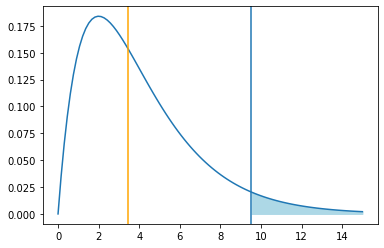

We zien dat χ2 in de steekproef links van de kritische waarde ligt, dus binnen het acceptatiegebied. Daarom kunnen we de nulhypothese niet verwerpen en concluderen dat de steekproef representatief is voor de populatie, tenminste tov. de soorten superhelden.

### oefening van het voorbeeld examen

U heeft onlangs monsters van drie producten aangeboden aan elke klant die uw bedrijf isbinnengekomen.  Vervolgens vroeg u welk product klanten het beste vonden.  U hebt dezevoorkeuren voor Product A, Product B en Product C vastgelegd in de dataset die hierondergegeven is. Zoek uit of de klanten al dan niet een uitgesproken voorkeur hadden voor  ́e ́en vandeze producten.

In [ ]:
# (a)Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Weeszo specifiek mogelijk!
# Xhi**2 test - goodness of fit

# (b)Formuleer de nulhypothese en de alternatieve hypothese
# H0: de klaneten vonden de 3 producten even goed
# H1 : de klanten vonden de 3 producten niet evengoed

# (c)Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symboolen de waarde
observed = df.Choice.value_counts()
print(observed)
expected_p = np.array([1/3,1/3,1/3])

alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

print(f"p-waarde is {p}>>0.05 =. er is voldoende aanwijzing om de H0 hypothese te verwerpen")
print(f"χ²-waarde is {chi2}>>{g} =. er is voldoende aanwijzing om de H0 hypothese te verwerpen")



# (d)Bereken de p-waarde
# (e)Welke conclusie trek je?
# (f)Formuleer een antwoord op de onderzoeksvraag.
#de klanten hadden zeker niet evenveel voorkeur voor elk van de 3 producten

Product C    48  
Product B    36  
Product A     6  
Name: Choice, dtype: int64  
Significance level  ⍺ = 0.05  
Sample size         n = 90  
k = 3; df = 2  
Chi-squared        χ² = 31.2000  
Critical value      g = 5.9915  
p-value             p = 0.0000  
p-waarde is 1.6788275299956632e-07>>0.05 =. er is voldoende aanwijzing om de H0 hypothese te verwerpen  
χ²-waarde is 31.2>>5.991464547107983 =. er is voldoende aanwijzing om de H0 hypothese te verwerpen

## Gestandaardiseerde residuen

Na het uitvoeren van een chikwadraattoets is het vaak ook interessant om te weten in welke categorieën de grootste afwijkingen voorkomen. Je zou kunnen kijken naar de waarde $\frac{(o-e)^2}{e}$ voor elke cel in de contingentietabel (of vector), die wordt gebruikt bij de berekening van χ2 . Hieruit kun je echter niet zeggen in hoeverre de afwijkingen echt als "extreem" kunnen worden beschouwd. Hiervoor gebruiken we zogenaamde gestandaardiseerde residuen.

We introduceren dit concept aan de hand van een voorbeeld:

Stel dat een bepaald onderzoek kijkt naar gezinnen met 5 kinderen. Er wordt een steekproef genomen van 1022 gezinnen, die worden onderverdeeld in categorieën op basis van het aantal jongens in het gezin. De frequenties staan hieronder in een Pandas DataFrame die we handmatig gaan aanmaken en systematisch uitbreiden.

In [ ]:
# Data frame with 2 columns:
#  - number of boys in the family (index)
#  - number of families in the sample with that number of boys
families = pd.DataFrame(
    np.array(
        [[0,  58],
         [1, 149],
         [2, 305],
         [3, 303],
         [4, 162],
         [5,  45]]),
    columns=['num_boys', "observed"])
families.set_index(['num_boys'])
n = families.observed.sum() # sample size

## Cochran's rule
Een chikwadraattoets kan alleen goede resultaten geven als je genoeg waarnemingen hebt in elke categorie. De statisticus Cochran (1954) formuleerde een vuistregel om te bepalen wat er precies *genoeg* is op contingentietabellen groter dan 2x2:

- Alle verwachte waarden moeten minimaal 1 zijn
- Maximaal 20% van de verwachte waarden mag kleiner zijn dan 5

# Module 5 - Bivariate analyse: kwalitatief versus kwantitatief

In deze module bespreken we het geval waarin de onafhankelijke variabele kwalitatief is en de afhankelijke kwantitatief. Enkele typische voorbeelden van onderzoeksvraag in dit geval:

- Zijn binnen een bepaalde diersoort mannelijke individuen significant groter dan vrouwtjes?
- Beschermt een nieuw vaccin tegen de ziekte zoals het hoort?
- Verbetert een bepaalde studiemethode zoals "ophaaloefening" de leerresultaten (d.w.z. de cijfers van studenten)?  

In deze cursus behandelen we alleen het geval waarin we twee groepen vergelijken. Er zijn methoden om meer dan twee groepen te vergelijken (bv. de ANOVA-test), maar die vallen buiten het bestek van deze cursus.

## data visualisatie
De volgende diagramtypen zijn mogelijk geschikt voor dit type gegevens:

- gegroepeerde boxplot of vioolplot
- gegroepeerde dichtheid (kde-)plot
- staafdiagram met foutbalken

###Boxplot of vioolplot

Breng voor een horizontale boxplot de onafhankelijke (kwalitatieve) variabele op de Y-as en de afhankelijke (kwantitatieve) variabele op de X-as in kaart. Ruil voor een verticale plot.

In [ ]:
tips = sns.load_dataset("tips")
sns.boxplot(data=tips, x='tip', y='sex');

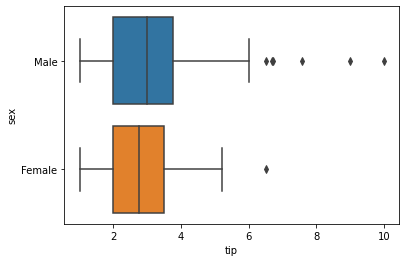

er is veel overlap tussen de verschillende groepen, dit geeft aan dat er geen relatie is tussen beide variabelen.

In [ ]:
sns.violinplot(data=tips, x='tip', y='sex');

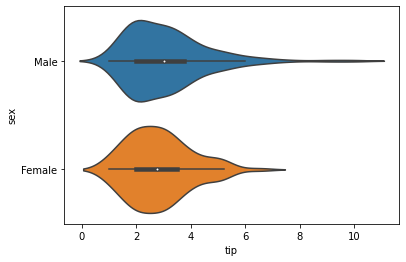

### Dichtheidsplot

Breng voor een dichtheidsgrafiek (kerneldichtheidsschatting) de onafhankelijke (kwalitatieve) variabele in kaart op het 'hue'-attribuut en de afhankelijke variabele op de X-as.

In [ ]:
sns.kdeplot(data=tips, hue='sex', x='tip');

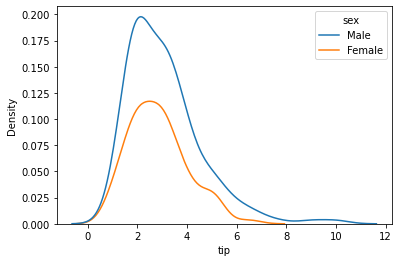

### Staafdiagram met foutbalken

Een ander diagramtype dat vaak voor dit type gegevens wordt gebruikt, is een staafdiagram van het steekproefgemiddelde van elke groep. Pas hierbij echter op. Alleen het tonen van het steekproefgemiddelde in een grafiek is onvoldoende om te bepalen of een verschil tussen groepen significant is. Een grafiek moet ook de spreiding in de dataset laten zien. Dit kan worden gevisualiseerd met behulp van foutbalken.

In [ ]:
sns.barplot(data=tips, x='sex', y='tip', ci='sd');

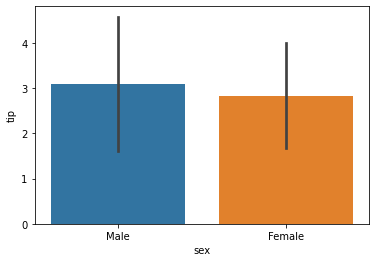

## The t-test for two independent samples

eerder hebben we gezien hoe we de t-toets kunnen toepassen om een uitspraak over het steekproefgemiddelde van een kleine steekproef te verifiëren. De t-toets kan ook worden gebruikt om twee steekproeven te vergelijken. Eerst bekijken we het geval van onafhankelijke steekproeven die afzonderlijk werden genomen.

Voorbeeld: In een klinische proef willen onderzoekers bepalen of een nieuw medicijn een verminderde reactiesnelheid, oftewel een hogere reactietijd, als bijwerking heeft. Zes deelnemers kregen het medicijn (behandelingsgroep), terwijl zes anderen een placebo kregen (controlegroep). Hun responstijd op een stimulus werd vervolgens gemeten (in ms). We willen onderzoeken of er significante verschillen zijn tussen de behandelings- en controlegroep.

In [ ]:
control = np.array([91, 87, 99, 77, 88, 91])
treatment = np.array([101, 110, 103, 93, 99, 104])

The population mean for patients in the control group is notated $\mu_1$, for those in the treatment group $\mu_2$.

The hypotheses are:

- $H_0$: $\mu_1 - \mu_2 = 0$ (reaction time is the same in both groups)
- $H_1$: $\mu_1 - \mu_2 < 0$ (reaction time is significantly higher in the treatment group compared to the control group)

In [ ]:
stats.ttest_ind(a=control, b=treatment,
    alternative='less', equal_var=False)

Ttest_indResult(statistic=-3.445612673536487, pvalue=0.003391230079206901)

De p-waarde is erg klein, wat betekent dat, als de nulhypothese correct zou zijn, het zeer onwaarschijnlijk is dat de verschillen tussen de twee groepen waarneembaar zijn. Daarom verwerpen we de nulhypothese. Op basis van de steekproef is er reden om te concluderen dat het medicijn inderdaad een significante invloed heeft op de reactiesnelheid.

Voorbeeld: Krijgen mannelijke en vrouwelijke medewerkers in de dataset fooien dezelfde fooi of is er een verschil?

In [ ]:
stats.ttest_ind(alternative='two-sided',
    a=tips.tip[tips.sex == 'Male'],
    b=tips.tip[tips.sex == 'Female']);

De p-waarde van 0,166 is vrij groot, dus we verwerpen de nulhypothese niet. Op een significantieniveau van b.v. 0.05 bevat de dataset geen bewijs dat mannelijke en vrouwelijke bedienend personeel verschillende fooien krijgen.

## The t-test for paired samples

In deze variant van de $t$-test wordt aan elk element van het monster een meting gedaan, één keer voor en één keer na een interventie. Het doel is om vast te stellen of de interventie een significant effect heeft gehad op de meting.

**Case:** In een onderzoek is gekeken of auto's die rijden op benzine met toevoegingen ook een lager verbruik hebben. Tien auto's werden eerst gevuld met ofwel gewone benzine ofwel benzine met additieven (bepaald door het opgooien van een muntstuk), waarna het verbruik werd gemeten (uitgedrukt in mijlen per gallon). De auto's werden vervolgens afgetankt met de andere soort benzine en het verbruik werd opnieuw gemeten.

We gebruiken een gepaarde $t$-test om te bepalen of auto's significant zuiniger zijn op benzine met additieven.

In [ ]:
# Measurements:
regular =   np.array([16, 20, 21, 22, 23, 22, 27, 25, 27, 28])
additives = np.array([19, 22, 24, 24, 25, 25, 26, 26, 28, 32])

# Paired t-test with ttest_rel()
stats.ttest_rel(regular, additives, alternative='less')

Ttest_relResult(statistic=-4.47213595499958, pvalue=0.00077494295585091)


We gebruiken `alternative='less'` omdat we willen controleren of de kilometerstand per gallon op gewone brandstof kleiner is dan op brandstof met toevoegingen.

De $p$-waarde, 0.0007749, is erg klein. Zelfs met een $\alpha = 0.01$ kunnen we de nulhypothese verwerpen. Volgens deze steekproef hebben we redenen om aan te nemen dat de brandstof met additieven inderdaad leidt tot een aanzienlijk lager brandstofverbruik.

### oefening van het oefenexamen
De steekproef die hieronder gegeven is, bevat meetresultaten van een variabele Temperatureop twee tijdstippen (time1entime2). We willen weten of de metingen op het tweede tijdstipsignificant verschillend zijn van die op het eerste tijdstip.Gebruik een geschikte statistische toets (met significantieniveau 5%) om deze uitspraak teverifi ̈eren

In [ ]:
# (a)Welke statistische toets moet je gebruiken om deze onderzoeksvraag te beantwoorden?Wees zo specifiek mogelijk!

#two sample t test for paired samples

# (b)Formuleer de nulhypothese en de alternatieve hypothese.

#H0 = de metingen op het 2de tijdsstip zijn niet significant verschillend vandie op de eerste tijdsstip
#H1 = de metingen op het 2de tijdsstip zijn significant verschillend vandie op de eerste tijdsstip

# (c)Bereken de p-waarde.

# Measurements:
time1 =   np.array(df.time1)
time2 = np.array(df.time2)

# Paired t-test with ttest_rel()
s,p = stats.ttest_rel(time1, time2, alternative='two-sided')

print(f"de p-waarde is {p} en is >> 5% => er is niet voldoende om H0 te verwerpen")
# (d)Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeks-vraag.

de p-waarde is 0.8743994859994443 en is >> 5% => er is niet voldoende om H0 te verwerpen

### Cohen's d
Cohen's d wordt gedefinieerd als het verschil tussen de gemiddelden van beide groepen, gedeeld door een gepoolde standaarddeviatie. Er is geen Python-functie voor het berekenen van Cohen's d direct beschikbaar, dus we definiëren het hier, volgens de formule:

In [ ]:
def cohen_d(a, b):
    na = len(a)
    nb = len(b)
    pooled_sd = np.sqrt( ((na-1) * a.std(ddof=1)**2 +
                          (nb-1) * b.std(ddof=1)**2) / (na + nb - 2) )
    return (b.mean() - a.mean()) / pooled_sd

In [ ]:
# Effect size of additives in gasoline:
cohen_d(regular, additives)

0.5573262931770191

# Module 6. Bivariate analyse van 2 kwantitatieve variabelen

In deze module bespreken we het geval waarin beide variabelen kwantitatief zijn. In het bijzonder zullen we het concept van lineaire regressie onderzoeken. Er bestaan ​​wel andere analysemethoden, maar die vallen buiten het bestek van deze cursus.

Regressieanalyse is een uiterst flexibel hulpmiddel dat op veel gebieden kan helpen bij het nemen van beslissingen. Kimes en Fitzsimmons (1990) beschrijven hoe het is gebruikt door La Quinta Motor Inns, een redelijk geprijsde hotelketen die gericht is op het bedienen van de zakenreiziger, om te helpen bij het nemen van beslissingen over de locatie van de locatie.

Er zijn twee mogelijke doelstellingen van regressieanalyse. Het eerste doel is om te begrijpen hoe de wereld werkt. Men zou bijvoorbeeld kunnen proberen te ontdekken of er sprake is van discriminatie op grond van geslacht in salarissen, rekening houdend met verschillen in werkervaring en opleidingsniveau.
Het tweede doel is om voorspellingen te doen. Een goed voorbeeld hiervan is wanneer de betreffende variabele bedrijfsverkopen is, en variabelen zoals reclame en eerdere verkoopniveaus als verklarende variabelen worden gebruikt.

## visualisatie

In [ ]:
sns.relplot(data=penguins, x='body_mass_g', y='flipper_length_mm')

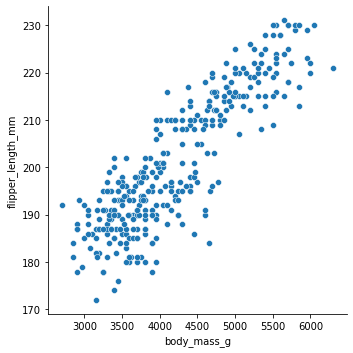

In [ ]:
sns.relplot(data=penguins,
            x='body_mass_g', y='flipper_length_mm',
            hue='species', style='sex')

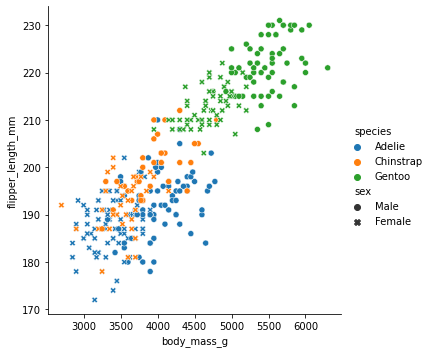

In [ ]:
sns.relplot(data=penguins,
            x='bill_depth_mm', y='bill_length_mm',
            size='body_mass_g', 
            hue='species', style='sex')

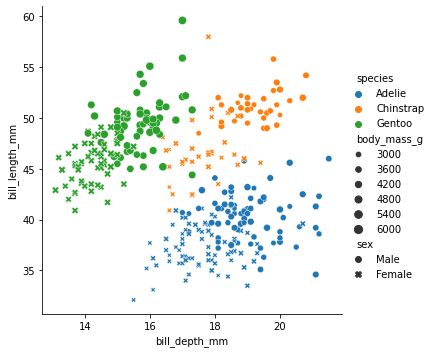

## Methode van de kleinste kwadraten

In [ ]:
sns.regplot(x=male_chinstrap.flipper_length_mm, y=male_chinstrap.body_mass_g)

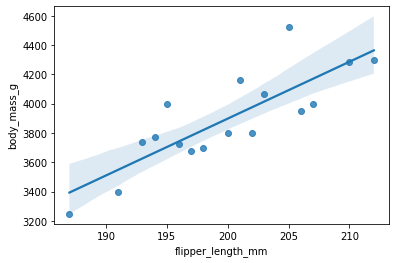

In [ ]:
from sklearn.linear_model import LinearRegression

male_chinstrap_x = male_chinstrap.flipper_length_mm.values.reshape(-1,1)
male_chinstrap_y = male_chinstrap.body_mass_g

weight_model = LinearRegression().fit(male_chinstrap_x, male_chinstrap_y)

print(f"Regression line: ŷ = {weight_model.intercept_} + {weight_model.coef_[0]} x")

Regression line: ŷ = -3868.3320373250385 + 38.83229652669777 x

### oefening uit het voorbeeldexamen


In [ ]:
sns.regplot(x=df.x, y=df.y)

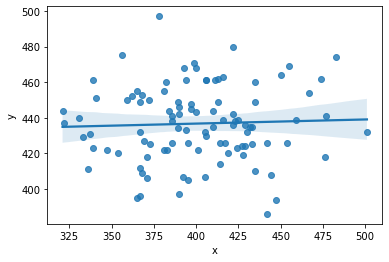

In [ ]:
from sklearn.linear_model import LinearRegression

x = df.x.values.reshape(-1,1)
y = df.y

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_} + {weight_model.coef_[0]} x")

Regression line: ŷ = 427.4330190404864 + 0.023210537909158994 x

In [ ]:
# (a)Bereken de richtingsco efficient van de regressierechte
print(f"de richtingscoeficient is {weight_model.coef_[0]}")

# (b)Bereken het snijpunt van de regressierechte met de y-as
print(f"het snijpunt met de y-as is {weight_model.intercept_}")

# bereken de covariantie
cov =np.cov(df.x, df.y, ddof=1)[0][1]
print(f"cov = {cov}")

# (c)Bereken de correlatieco ̈effici ̈ent (symbool + waarde)
cor = np.corrcoef(df.x,df.y)[0][1]
print(f"R = {cor}")

# (d)Formuleer een interpretatie voor de waarde van de correlatieco ̈effici ̈ent
#teken is positief => stijgend verband
# grootte van R ~ 0 => zeer zwak verband

# (e)Bereken de determinatieco ̈effici ̈ent (symbool + waarde)
print(f"R**2= {cor**2}")
# (f)Geef een interpretatie voor de waarde van de determinatieco ̈effici ̈ent
#grootte van R**2 is ongeveer nul => zwak verband
# verklaring van de variantie

de richtingscoeficient is 0.023210537909158994  
het snijpunt met de y-as is 427.4330190404864  
cov = 33.26111111111113  
R = 0.04160588959380872  
R**2= 0.0017310500488922004

## Covariantie

Bij covariantie en correlatie (zie volgende paragraaf) zijn twee variabelen betrokken. Elk meet specifiek de sterkte en richting van een lineaire relatie tussen twee numerieke variabelen. Intuïtief is de relatie "sterk" als de punten in een spreidingsdiagram strak rond een rechte lijn liggen. Als deze rechte lijn van links naar rechts stijgt, is de relatie positief en zullen de maten positieve getallen zijn. Als het van links naar rechts valt, is de relatie negatief en zijn de maten negatieve getallen.

We zullen een DataFrame definiëren met de gegevens die in de collegedia's worden gebruikt:

In [ ]:
families = pd.DataFrame(data={
    'x': [1,1,2,2,2,2,3,3,3,3,4,4,4,5,6],
    'y': [2,3,2,3,4,5,2,3,4,5,5,6,8,6,7]
})

sns.regplot(x=families.x, y=families.y) # data set with its regression line
plt.axvline(families.x.mean(), lw=1, color='g', linestyle='dashed')  # Plot mean of x
plt.axhline(families.y.mean(), lw=1, color='y', linestyle='dashed')  # Plot mean of y

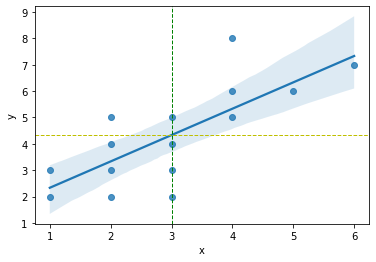

Covariantie is in wezen een gemiddelde van producten van afwijkingen van gemiddelden. Als X en Y in dezelfde richting variëren, zal Y, wanneer X boven zijn gemiddelde ligt, de neiging hebben boven zijn gemiddelde te zijn, en wanneer X onder zijn gemiddelde ligt, zal Y de neiging hebben onder zijn gemiddelde te liggen. In beide gevallen zal het product van afwijkingen positief zijn - een positief maal een positief of een negatief maal een negatief - dus de covariantie zal positief zijn. Het tegenovergestelde is waar wanneer X en Y in tegengestelde richtingen variëren. Dan is de covariantie negatief.

In [ ]:
mx = families.x.mean()
my = families.y.mean()

covar = sum((families.x - mx) * (families.y - my)) / (len(families.x) - 1)
print(f"Cov(x,y) = {covar}")

Cov(x,y) = 2.0

In [ ]:
# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(families.x, families.y)[0][1]
print(f"R = {cor}")

R = 0.7533708035008838

In [ ]:
cor ** 2

0.5675675675675673  
Dus voor dit geval wordt ongeveer 57% van de variantie in de waarnemingen verklaard door de regressielijn, die een sterk lineair verband aangeeft (zie hieronder).

De klasse LinearModel heeft ook een methode om de determinatiecoëfficiënt te berekenen. We moeten eerst de methode fit() aanroepen en dan kunnen we de methode score() gebruiken die R2 . retourneert


| $abs(R)$  |  $R^2$   | Explained variance |   Linear relation    |
| :-------: | :------: | :----------------: | :------------------: |
|   < .3    |   < .1   |       < 10%        |      very weak       |
|  .3 - .5  | .1 - .25 |     10% - 25%      |         weak         |
|  .5 - .7  | .25 - .5 |     25% - 50%      |       moderate       |
| .7 - .85  | .5 - .75 |     50% - 75%      |        strong        |
| .85 - .95 | .75 - .9 |     75% - 90%      |     very strong      |
|   > .95   |   > .9   |       > 90%        | exceptionally strong |


# Module 7. Time series analysis

In [ ]:
demand_ts = pd.Series(
    data=[4, 16, 12, 25, 13, 12, 4,  8, 9, 14,
          3, 14, 14, 20,  7,  9, 6, 11, 3, 11,
          8,  7,  2,  8,  8, 10, 7, 16, 9,  4]
)
demand_ts.plot(marker='o')

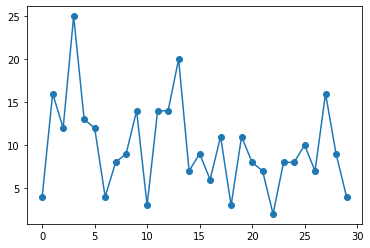

## Time series models

In de onderstaande grafiek proberen we waargenomen waarden te modelleren met een constante functie Xt=b+εt (met wat willekeurige ruis met constante variantie). Als schatting voor b nemen we het gemiddelde van de eerste waarnemingen. We kunnen in principe ons eigen oordeel gebruiken om te kiezen hoeveel.

In [ ]:
b_est_20 = demand_ts[0:20].mean()
b_est_30 = demand_ts[0:30].mean()

demand_ts.plot(marker='o')             # Plot the time series
plt.axhline(y=b_est_20, color='red')   # Mean of first 20 observations
#plt.axhline(y=b_est_30, color='blue')  # Mean of first 30 observations

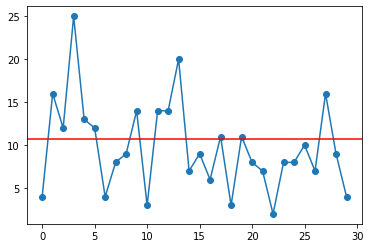

In [ ]:
# Build a linear regression model
demand_lm = LinearRegression().fit(
    demand_ts.index.values.reshape((-1,1)),
    demand_ts.values
)
# plot the time series and the regression line
demand_ts.plot(marker='o')
plt.axline((0, demand_lm.intercept_), slope=demand_lm.coef_)

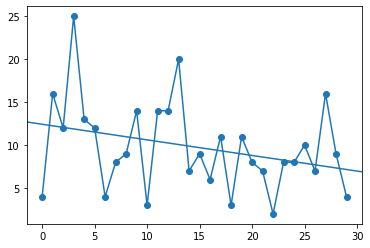

In [ ]:
sns.regplot(x=demand_ts.index, y=demand_ts.values)

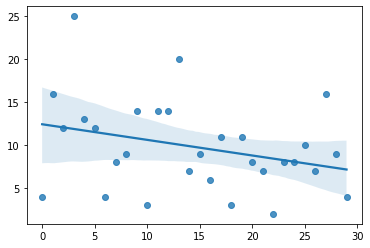

## voortschrijdend gemiddelde
We basically need a method that takes the last observations into account, but forgets observations after some time. Older observations may no longer be representative of the current demand. Moving averages are such methods.

It's useful to create a DataFrame to store the observations and associated moving averages.

In [ ]:
demand_df = pd.DataFrame(data={
    'demand': demand_ts
})
demand_df.plot(marker='o')

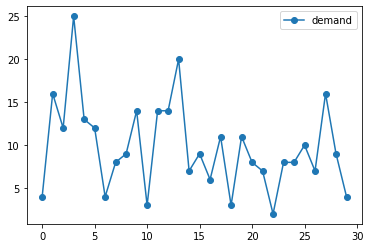

## Eenvoudig voortschrijdend gemiddelde

In [ ]:
demand_df['SMA3'] = demand_df.demand.rolling(3).mean()
demand_df['SMA5'] = demand_df.demand.rolling(5).mean()
demand_df['SMA10'] = demand_df.demand.rolling(10).mean()
demand_df

In [ ]:
demand_df.plot()

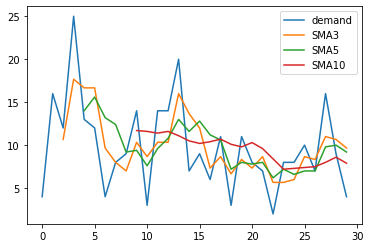

### Double exponential smoothing

If we suspect that there is a long-term (increasing or decreasing) trend in the time series, we can use Double Exponential Smoothing (DES), also called Holt's Method.

$$X_{t} = \alpha x_{t} + (1-\alpha)(X_{t-1} + b_{t-1})$$

$$b_{t} = \beta(X_{t}-X_{t-1}) + (1-\beta)b_{t-1}$$

with smoothing parameters $0 < \alpha < 1$ and $0 < \beta < 1$. $b_t$ is an estimate for the trend at time $t$ and can also be interpreted as the slope of a regression line.

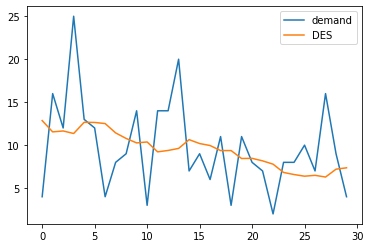

### Triple Exponential Smoothing

Triple Exponential Smoothing (TES), also called *Holt-Winter's Method*, can in addition also model seasonally recurring trends.

- Level smoothing: $X_{t} = \alpha \frac{x_{t}}{c_{t-L}} + (1-\alpha) (X_{t-1} + b_{t-1})$
- Trend smoothing: $b_{t} = \beta (X_{t} - X_{t-1}) + (1-\beta)b_{t-1}$ 
- Seasonal smoothing: $c_{t} = \gamma \frac{x_{t}}{X_{t}} + (1-\gamma)c_{t-L}$

In these formulas, the following additional notation is used:

- $L$ is the length (in number of time units) of the seasonal cycle. Common values are 7 for a weekly cycle, 4 for a quarterly one, 12 for a monthly cycle, etc.
- $0 < \gamma < 1$ is the smoothing parameter for the seasonal trend (like $\alpha$ and $\beta$). Set this value in the `fit()` method using argument `smoothing_seasonal`.
- $c_t$ are estimates for the seasonal correction factors, one for each time unit $t\mod L$ within the seasonal cycle.

The example dataset used in the previous sections is not suitable for this, as it has no seasonal trend. Instead, we will use a demo dataset from Seaborn with air passenger data for 12 years from 1949 to 1960.

The dataset has two columns for the date (year and month). To make our lives a bit easier, we'll add a column with the date using Pandas' `date_range()` function. The `freq='MS'` parameter denotes that we want each consecutive date in the range to be the first day of the next month.

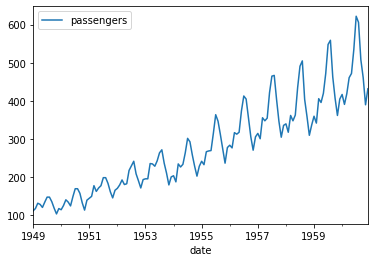


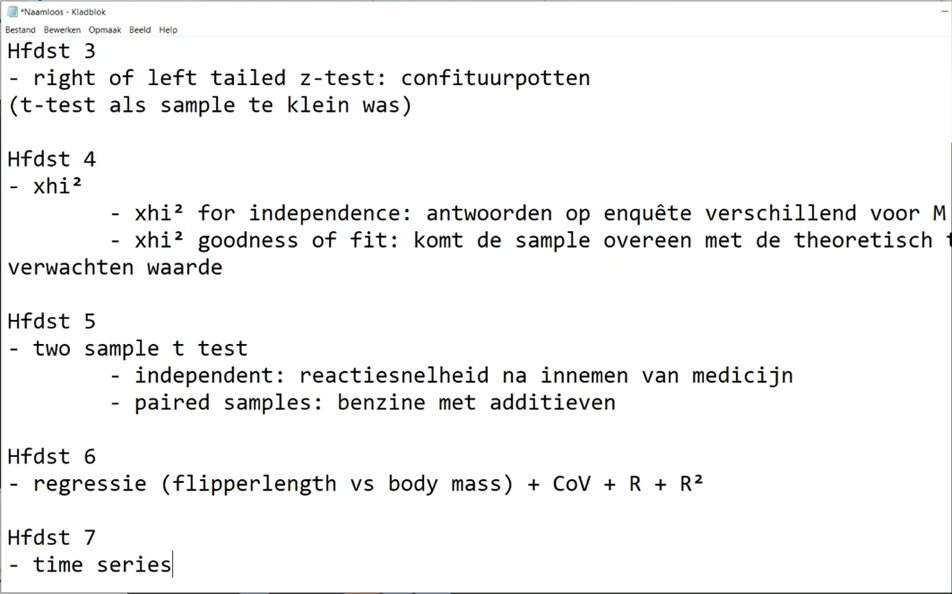